In [1]:
import jyrobot

In [2]:
world = jyrobot.load("duck-scribbler-no-walls")

In [3]:
world.watch("panel")

In [4]:
world.reset()
world.real_time = False
world.robot["White"].move(0, 1)
world.robot["Red"].move(1, 0)

In [5]:
def control(robot):
    if robot.stalled:
        robot.tvx = -robot.tvx
    if robot.name == "Red":
        pic = robot.cameras[0].takePicture()
        world.display(pic)


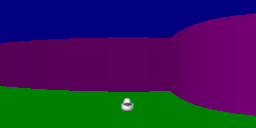

CPU times: user 33.5 s, sys: 263 ms, total: 33.8 s
Wall time: 33.3 s


In [6]:
%%time
world.run([control, control])